# Analyse scène compétitive Pokemon

## Analyse exploratoire

### Types des pokémons

Commençons par charger les packages requis puis notre base de données.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Les options suivantes permettent d'afficher toutes les lignes et colonnes voulues lorsqu'on appelle la fonction print
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [2]:
data = pd.read_csv("database.csv")
print(data.shape)
data.head()

(801, 91)


,name,type1,type2,abilities,attack,defense,hp,sp_attack,sp_defense,speed,generation,pokedex_number,2016-11,2016-12,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06
0,Bulbasaur,grass,poison,"['Overgrow', 'Chlorophyll']",49,49,45,65,65,45,1,1,0.00074,NaN,0.03461,0.02797,0.02382,0.02720,0.01682,0.01843,0.02595,0.03974,0.02511,0.02080,0.02069,0.02855,0.01648,0.02311,0.01988,0.01725,0.01794,0.02530,0.01559,0.01734,0.01399,0.03277,0.02829,0.02683,0.02314,0.02509,0.02230,0.01944,0.01551,0.02139,0.01650,0.02930,0.02045,0.02795,0.03789,0.03421,0.06302,0.05264,0.06056,0.02220,0.02383,0.04321,0.04417,0.03563,0.03771,0.02933,0.03967,0.02490,0.03527,0.02879,0.03378,0.03517,0.03760,0.03142,0.04389,0.05165,0.03082,0.03361,0.02527,0.03349,0.05667,0.01827,0.02346,0.01749,0.03871,0.01270,0.02207,0.02294,0.01961,0.03216,0.01220,0.01797,0.03031,0.02132,0.01944,0.03856,0.01575
1,Ivysaur,grass,poison,"['Overgrow', 'Chlorophyll']",62,63,60,80,80,60,1,2,0.00097,NaN,0.00877,0.01019,0.01065,0.01153,0.00646,0.01171,0.01033,0.01352,0.00891,0.01092,0.01086,0.00977,0.01123,0.01396,0.01542,0.01103,0.01656,0.01505,0.02054,0.01797,0.01732,0.02527,0.02354,0.02169,0.02175,0.01733,0.02847,0.02013,0.01734,0.01810,0.01273,0.02084,0.03239,0.04018,0.01329,0.02444,0.04198,0.05683,0.03729,0.01896,0.01197,0.01855,0.02084,0.01929,0.03040,0.01607,0.01510,0.02353,0.02183,0.04048,0.02217,0.02660,0.01288,0.01433,0.01507,0.01594,0.01158,0.02390,0.01316,0.03202,0.00558,0.05025,0.02307,0.03032,0.06745,0.02575,0.00910,0.00765,0.00792,0.00984,0.01017,0.00751,0.03697,0.01302,0.00499,0.00191,0.00463
2,Venusaur,grass,poison,"['Overgrow', 'Chlorophyll']",100,123,80,122,120,80,1,3,0.04425,NaN,0.99016,0.97451,0.89342,1.12268,1.02873,0.89334,0.92881,0.97994,0.97703,0.80170,0.78573,0.94346,1.00323,0.98483,0.98212,0.99975,1.07955,0.93776,0.91757,0.97033,1.13316,1.15743,1.07120,1.23751,1.25630,1.09219,1.06142,1.07328,1.05697,1.11976,1.17002,1.42118,1.49850,1.60336,1.83298,1.74389,1.89236,1.74093,1.79848,1.84136,1.77656,1.76807,1.81651,1.84293,1.99035,2.00136,1.89255,1.88023,1.63743,1.56226,1.57472,1.49181,1.74601,1.82667,1.62228,1.84764,1.76369,1.60150,1.63142,1.73750,1.72326,1.64481,1.34682,1.33558,1.50314,1.36292,1.55990,1.34951,1.43368,1.89932,1.85906,1.24737,1.23153,1.30983,1.23125,1.18794,1.43387
3,Charmander,fire,NaN,"['Blaze', 'Solar Power']",52,43,39,60,50,65,1,4,0.00051,NaN,0.01430,0.01304,0.01427,0.01086,0.01000,0.01514,0.01261,0.01057,0.00927,0.01097,0.00997,0.01325,0.00992,0.01472,0.00900,0.01034,0.00807,0.00828,0.00764,0.00666,0.00766,0.01697,0.00911,0.00626,0.00809,0.00769,0.00644,0.01105,0.00787,0.00762,0.00703,0.00696,0.00923,0.01120,0.01266,0.00911,0.02001,0.01635,0.01733,0.01353,0.00874,0.01688,0.01544,0.01351,0.01693,0.01739,0.02013,0.01259,0.00766,0.01568,0.01483,0.01086,0.01062,0.01091,0.01463,0.00781,0.01372,0.02195,0.00627,0.02486,0.02855,0.00933,0.00736,0.00972,0.00215,0.00688,0.00573,0.00401,0.00717,0.01444,0.00457,0.00536,0.03197,0.01191,0.00446,0.01258,0.01606
4,Charmeleon,fire,NaN,"['Blaze', 'Solar Power']",64,58,58,80,65,80,1,5,0.00046,NaN,0.00891,0.01304,0.01270,0.00729,0.00922,0.01323,0.01116,0.01453,0.01008,0.00871,0.01030,0.01036,0.00940,0.00930,0.01030,0.00619,0.00674,0.00762,0.00764,0.00542,0.00653,0.00915,0.01037,0.01412,0.00796,0.00632,0.00453,0.00946,0.00708,0.00562,0.00631,0.00564,0.00718,0.01010,0.01484,0.00889,0.01564,0.01232,0.01614,0.00721,0.00531,0.02110,0.00777,0.01400,0.01809,0.01032,0.0

#### Fréquence des types dans le pokédex

Nous commencerons par afficher les proportions relatives des $18$ types de pokémon au sein du pokédex de la 7ème génération. Notons que les pokémon ayant un double type contribuent à chacun de leurs types, et que les répartitions des types principaux et secondaires sont sensiblement différentes (pour le type "Vol" notamment). Nous utiliserons un code couleur spécifique pour mieux visualiser les différents types.

In [3]:
def couleurs(types):
    colors = []
    code_couleurs = {
        'default' : 'xkcd:white',
        'grass' : 'xkcd:green',
        'water' : 'xkcd:blue',
        'fire' : 'xkcd:red',
        'electric' : 'xkcd:yellow',
        'normal' : 'xkcd:off white',
        'flying' : 'xkcd:sky blue',
        'fairy' : 'xkcd:light pink',
        'ice' : 'xkcd:cyan',
        'steel' : 'xkcd:grey',
        'dragon' : 'xkcd:cerulean',
        'ghost' : 'xkcd:lavender',
        'fighting' : 'xkcd:beige',
        'dark' : 'xkcd:dark grey',
        'ground' : 'xkcd:orange',
        'poison' : 'xkcd:magenta',
        'rock' : 'xkcd:light brown',
        'psychic' : 'xkcd:hot pink',
        'bug' : 'xkcd:bright green',
    }
    for t in types:
        if pd.isna(t):
            colors.append(code_couleurs['default'])
        else:
            colors.append(code_couleurs[t])
    return np.array(colors)

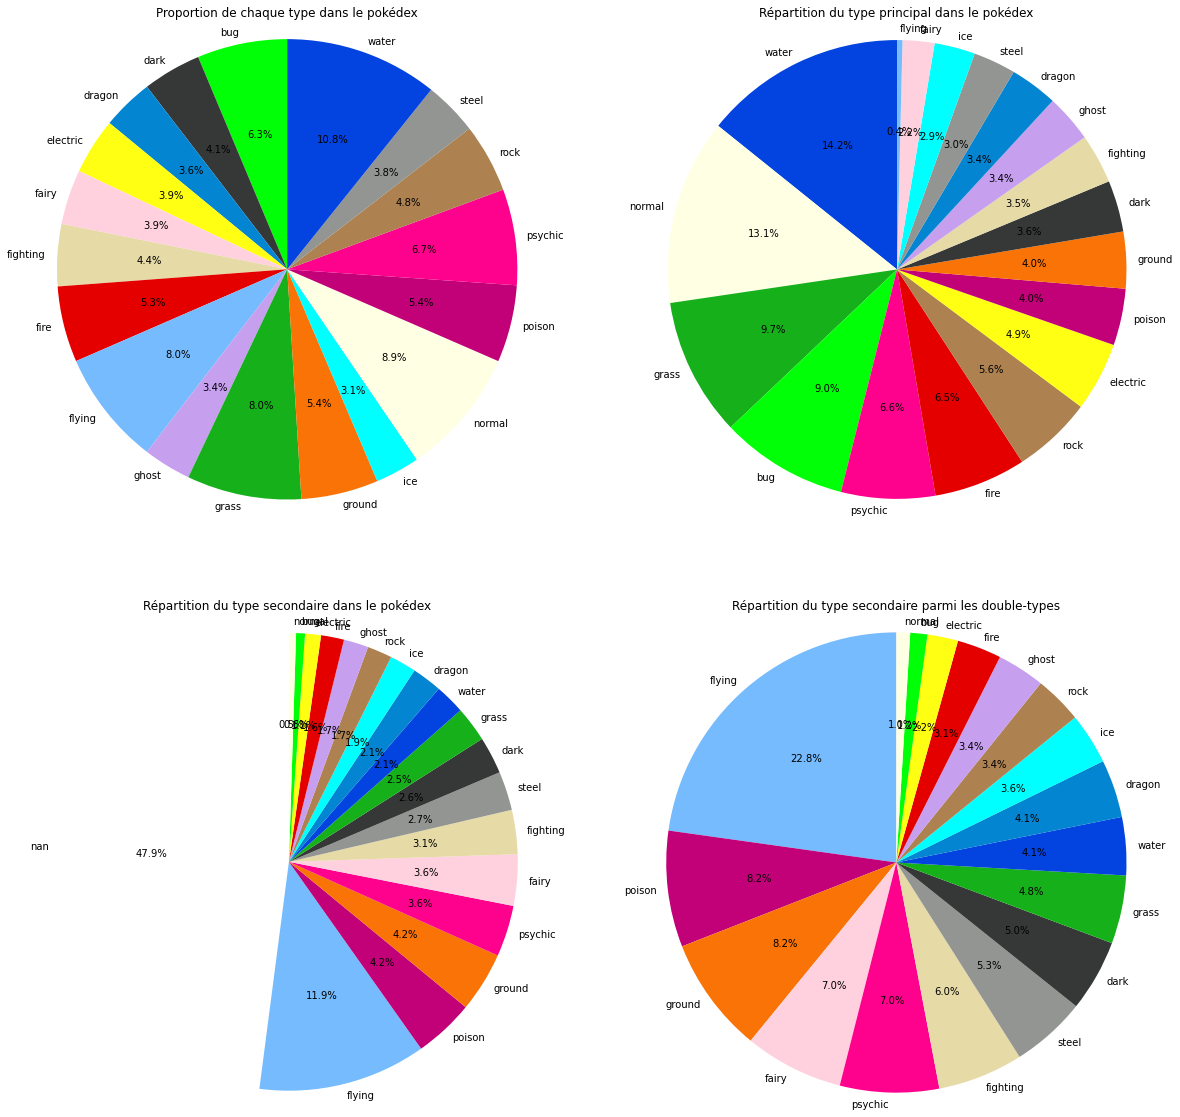

In [4]:
type_1_counts = data["type1"].value_counts()
type_2_counts = data["type2"].value_counts()
type_2_real_counts = data["type2"].value_counts(dropna=False)

type_counts = type_1_counts + type_2_counts

fig, ax = plt.subplots(2,2,figsize=(20,20))

ax[0,0].pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90,
            radius=1, labeldistance=1.05, colors=couleurs(type_counts.index))
ax[0,0].axis('equal')
ax[0,0].set_title("Proportion de chaque type dans le pokédex")

ax[0,1].pie(type_1_counts, labels=type_1_counts.index, autopct='%1.1f%%', startangle=90,
            radius=1, labeldistance=1.05, colors=couleurs(type_1_counts.index))
ax[0,1].axis('equal')
ax[0,1].set_title("Répartition du type principal dans le pokédex")

ax[1,0].pie(type_2_real_counts, labels=type_2_real_counts.index, autopct='%1.1f%%', startangle=90,
            radius=1, labeldistance=1.05, colors=couleurs(type_2_real_counts.index))
ax[1,0].axis('equal')
ax[1,0].set_title("Répartition du type secondaire dans le pokédex")

ax[1,1].pie(type_2_counts, labels=type_2_counts.index, autopct='%1.1f%%', startangle=90,
            radius=1, labeldistance=1.05, colors=couleurs(type_2_counts.index))
ax[1,1].axis('equal')
ax[1,1].set_title("Répartition du type secondaire parmi les double-types")

plt.show()

#### Utilisation des différents types sur la scène compétitive

On va observer la fréquence d'utilisation des différents types de pokémon lors des combats stratégiques. Les pokemon ayant un double types sont comptabilisés dans chacun de leurs deux types.

Commençons par filtrer la base de données pour ne conserver que les types et fréquences d'utilisation des différents pokémon, en les dédoublant en cas de double-type.

In [5]:
data_types = data.drop(columns = ['name', 'abilities', 'attack', 'defense', 'hp',
            'sp_attack', 'sp_defense', 'speed', 'generation', 'pokedex_number'])

data_left = data_types.drop(columns=["type2"])
data_right = data_types.drop(columns=["type1"])
data_right.dropna(axis=0, subset=['type2'], inplace=True)

data_left.rename(columns={"type1" : "type"}, inplace=True)
data_right.rename(columns={"type2" : "type"}, inplace=True)

data_types = pd.concat([data_left, data_right], ignore_index=True)
print(data_types.shape)
data_types.head()

(1218, 80)


,type,2016-11,2016-12,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06
0,grass,0.00074,NaN,0.03461,0.02797,0.02382,0.02720,0.01682,0.01843,0.02595,0.03974,0.02511,0.02080,0.02069,0.02855,0.01648,0.02311,0.01988,0.01725,0.01794,0.02530,0.01559,0.01734,0.01399,0.03277,0.02829,0.02683,0.02314,0.02509,0.02230,0.01944,0.01551,0.02139,0.01650,0.02930,0.02045,0.02795,0.03789,0.03421,0.06302,0.05264,0.06056,0.02220,0.02383,0.04321,0.04417,0.03563,0.03771,0.02933,0.03967,0.02490,0.03527,0.02879,0.03378,0.03517,0.03760,0.03142,0.04389,0.05165,0.03082,0.03361,0.02527,0.03349,0.05667,0.01827,0.02346,0.01749,0.03871,0.01270,0.02207,0.02294,0.01961,0.03216,0.01220,0.01797,0.03031,0.02132,0.01944,0.03856,0.01575
1,grass,0.00097,NaN,0.00877,0.01019,0.01065,0.01153,0.00646,0.01171,0.01033,0.01352,0.00891,0.01092,0.01086,0.00977,0.01123,0.01396,0.01542,0.01103,0.01656,0.01505,0.02054,0.01797,0.01732,0.02527,0.02354,0.02169,0.02175,0.01733,0.02847,0.02013,0.01734,0.01810,0.01273,0.02084,0.03239,0.04018,0.01329,0.02444,0.04198,0.05683,0.03729,0.01896,0.01197,0.01855,0.02084,0.01929,0.03040,0.01607,0.01510,0.02353,0.02183,0.04048,0.02217,0.02660,0.01288,0.01433,0.01507,0.01594,0.01158,0.02390,0.01316,0.03202,0.00558,0.05025,0.02307,0.03032,0.06745,0.02575,0.00910,0.00765,0.00792,0.00984,0.01017,0.00751,0.03697,0.01302,0.00499,0.00191,0.00463
2,grass,0.04425,NaN,0.99016,0.97451,0.89342,1.12268,1.02873,0.89334,0.92881,0.97994,0.97703,0.80170,0.78573,0.94346,1.00323,0.98483,0.98212,0.99975,1.07955,0.93776,0.91757,0.97033,1.13316,1.15743,1.07120,1.23751,1.25630,1.09219,1.06142,1.07328,1.05697,1.11976,1.17002,1.42118,1.49850,1.60336,1.83298,1.74389,1.89236,1.74093,1.79848,1.84136,1.77656,1.76807,1.81651,1.84293,1.99035,2.00136,1.89255,1.88023,1.63743,1.56226,1.57472,1.49181,1.74601,1.82667,1.62228,1.84764,1.76369,1.60150,1.63142,1.73750,1.72326,1.64481,1.34682,1.33558,1.50314,1.36292,1.55990,1.34951,1.43368,1.89932,1.85906,1.24737,1.23153,1.30983,1.23125,1.18794,1.43387
3,fire,0.00051,NaN,0.01430,0.01304,0.01427,0.01086,0.01000,0.01514,0.01261,0.01057,0.00927,0.01097,0.00997,0.01325,0.00992,0.01472,0.00900,0.01034,0.00807,0.00828,0.00764,0.00666,0.00766,0.01697,0.00911,0.00626,0.00809,0.00769,0.00644,0.01105,0.00787,0.00762,0.00703,0.00696,0.00923,0.01120,0.01266,0.00911,0.02001,0.01635,0.01733,0.01353,0.00874,0.01688,0.01544,0.01351,0.01693,0.01739,0.02013,0.01259,0.00766,0.01568,0.01483,0.01086,0.01062,0.01091,0.01463,0.00781,0.01372,0.02195,0.00627,0.02486,0.02855,0.00933,0.00736,0.00972,0.00215,0.00688,0.00573,0.00401,0.00717,0.01444,0.00457,0.00536,0.03197,0.01191,0.00446,0.01258,0.01606
4,fire,0.00046,NaN,0.00891,0.01304,0.01270,0.00729,0.00922,0.01323,0.01116,0.01453,0.01008,0.00871,0.01030,0.01036,0.00940,0.00930,0.01030,0.00619,0.00674,0.00762,0.00764,0.00542,0.00653,0.00915,0.01037,0.01412,0.00796,0.00632,0.00453,0.00946,0.00708,0.00562,0.00631,0.00564,0.00718,0.01010,0.01484,0.00889,0.01564,0.01232,0.01614,0.00721,0.00531,0.02110,0.00777,0.01400,0.01809,0.01032,0.02146,0.01272,0.01084,0.03662,0.01175,0.01345,0.01010,0.01042,0.00635,0.00515,0.00980,0.01399,0.01712,0.01053,0.01116,0.02798,0.00557,0.00330,0.00215,0.00459,0.00236,0.00612,0.00660,0.00547,0.00254,0.00483,0.00300,0.00471,0.00158,0.06208,0.02162


A présent il nous suffit de sommer les entrées selon les types.

In [6]:
data_types = data_types.groupby(by='type').agg(np.sum)

print(data_types.shape)
data_types.head()

(18, 79)


,2016-11,2016-12,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06
type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bug,58.75320,45.41937,38.98597,40.72197,27.73647,26.21577,22.44473,21.28264,22.00342,22.47100,22.64335,23.20370,22.81848,23.04171,23.22913,24.06647,23.44957,23.55866,23.63651,22.98446,22.67433,22.65759,23.66473,23.31085,22.17353,22.95028,23.13654,23.27290,23.19594,22.97459,22.11541,21.83465,21.95137,23.45503,23.85114,24.76538,27.24115,26.03623,27.90784,26.20223,25.96980,25.35303,25.80020,25.26991,25.02861,24.43647,24.42859,25.78225,25.69676,25.33219,25.17769,26.07104,26.33148,25.80709,25.83584,26.42791,25.44704,25.80682,25.40052,25.97273,26.49515,25.41469,26.24497,25.17689,24.07377,23.00941,22.28339,21.87329,23.13610,23.76042,22.91230,25.08930,25.21184,25.32659,23.78013,24.21135,26.28010,24.45212,25.26760
dark,25.58622,21.35305,32.27271,34.26951,37.74561,36.57863,37.79215,37.51801,37.34190,36.91241,35.69238,37.18154,36.18680,34.94835,34.27087,35.67140,35.93948,35.74725,36.33091,35.71410,34.95756,34.88831,32.82557,32.25492,32.85663,32.40089,33.24161,33.22671,33.42520,32.30524,32.46176,32.28658,32.33581,32.44424,33.12576,33.55447,35.90850,36.01697,35.61958,35.49394,34.87897,34.36113,33.63707,34.13881,34.26133,34.15849,34.97992,35.70389,35.31086,34.90533,36.33530,36.02950,37.14306,36.57126,35.97903,35.23995,34.58445,35.43631,34.38402,34.12917,34.13999,33.71306,33.36543,32.92736,33.18735,32.33597,33.10650,33.18989,31.92130,33.73710,32.60333,34.82014,32.29584,31.73666,31.40811,33.92540,32.56244,31.47091,49.44012
dragon,44.76312,43.96656,43.70788,44.09414,46.10297,47.07782,49.79042,46.56547,45.31725,45.34361,45.50958,40.40063,41.96539,40.41351,39.53168,39.57261,39.76770,38.39790,39.38098,37.83143,39.29448,38.36929,37.33705,38.04757,38.14819,31.38550,30.88918,32.05924,34.47161,34.37425,33.58980,33.46450,33.43913,33.35271,33.56859,34.60594,36.41376,36.04208,36.04209,35.31295,35.62765,35.28780,35.21327,36.01736,35.57585,34.25208,36.45188,36.03250,35.66446,36.13828,35.04296,34.19389,35.11384,35.37531,34.56359,34.98063,33.29229,33.61269,33.35982,32.42043,32.71952,33.39773,32.56729,32.12217,32.28434,32.01195,32.51758,32.50262,31.35314,31.34281,31.89886,33.01625,33.24758,32.34747,34.06502,33.38207,33.63452,32.42450,33.20525
electric,26.67210,32.25335,28.79598,27.92926,27.38088,26.99659,24.49814,22.96967,23.82323,24.69726,24.60272,22.69982,23.74536,25.56994,26.76683,26.88454,26.48686,25.88918,25.13887,23.02438,22.66740,24.44039,25.16224,25.39965,24.46444,25.63177,25.47943,25.45029,25.31483,25.43095,25.78473,24.98528,24.80497,25.07229,25.34384,24.82056,24.93170,25.03392,25.06567,25.17993,24.78522,23.87637,23.92544,23.81506,23.99933,24.20936,24.33456,25.45828,25.11463,24.78297,25.33990,25.08709,25.62268,25.34591,25.45997,24.44822,23.92580,23.64546,23.77175,24.47244,24.56238,24.54315,24.71043,24.62015,22.84643,23.24619,22.59932,22.10962,23.45372,23.65570,23.74536,23.98012,23.67782,22.99914,22.52827,22.85001,22.88106,22.99808,22.67197
fairy,43.07251,46.83439,33.59314,30.31793,32.89943,33.81081,35.50176,38.37932,38.83758,36.86263,36.39022,37.08599,37.63260,37.55391,36.68923,36.81748,37.34580,38.92492,38.88962,38.42334,37.27063,36.51063,36.50076,37.95819,36.86987,35.94311,36.71951,36.63786,36.65220,37.35898,38.38794,38.50166,36.55589,35.46414,35.48564,35.63366,36.44777,36.40340,35.74394,36.98406,37.27156,37.90844,38.04028,37.15925,36.41640,37.

Nous allons regarder les fréquences d'utilisation des types sur la durée totale couverte par nos données.

D:\Anaconda\envs\IML\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
D:\Anaconda\envs\IML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\monte\AppData\Local\Temp\ipykernel_11996\4180452008.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


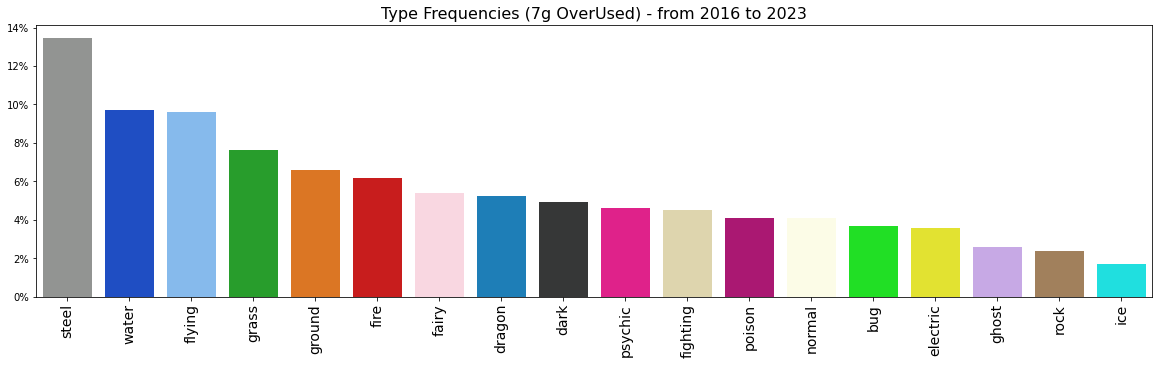

In [7]:
import seaborn as sns

#Affichage des types les plus fréquents
def frequency_barplot(df):
    fig, ax = plt.subplots(1,1,figsize=(20,5))
    
    #Notons que la fonction trie le dataframe !
    df.sort_values(ascending=False, inplace = True)
    df = df/df.sum()
    X = list(range(df.shape[0]))
    sns.barplot(X, df.values, palette=couleurs(df.index), ax=ax)
    #sns.barplot(list(range(df.shape[0])), df.values, palette='hls', ax=ax)
    
    ax.set_xticks(X)
    ax.set_xticklabels(df.index, fontsize=14, rotation=90)
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
    return ax

#requiert un df en mode "types = colonnes"

#On va compter les occurences en sommant les apparitions de chaque mot dans TOUS les documents du corpus
count = data_types.T.sum()

#Puis faire appel à notre fonction d'affichage pour représenter le résultat obtenu
ax = frequency_barplot(count)
ax.set_title("Type Frequencies (7g OverUsed) - from 2016 to 2023", fontsize=16);

On peut également observer l'évolution de l'utilisation des différents types tout au long de la scène compétitive 7G OverUsed.

C:\Users\monte\AppData\Local\Temp\ipykernel_11996\1441958098.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


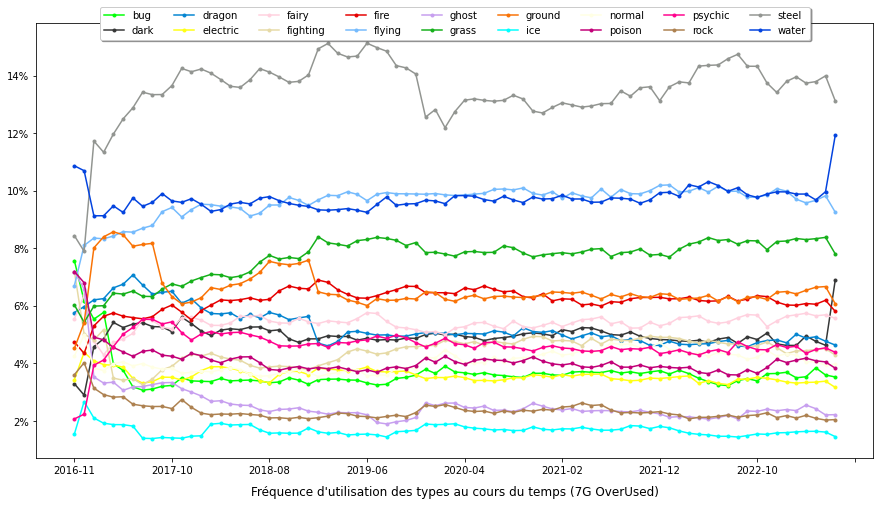

In [8]:
import matplotlib.colors as cm

c_map = cm.ListedColormap(couleurs(data_types.index), name='poketypes')

freq = data_types/data_types.sum()

ax = freq.T.plot(figsize=(15,8), colormap=c_map, style='.-')
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
ax.set_title("Fréquence d'utilisation des types au cours du temps (7G OverUsed)", y=-0.1)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=9, fancybox=True, shadow=True)

Les premiers mois présentent une phase chaotique, liée à l'installation et la stabilisation du métagame. Au bout d'un an de compétition, les fréquences d'utilisation relatives des différents types semblent relativement stables jusqu'à la fin (le dernier mois est biaisé par un manque de données).

On identifie aisément l'importance du type "acier", suivi par les types "eau" et "dragon" ; dans le bas du graphe, on retrouve les types les moins appréciés défensivement, à savoir "spectre", "roche" et enfin le type "glace".